## Introduction
Thousands of houses are sold everyday. There are some questions every buyer asks himself like: What is the actual price that this house deserves? Am I paying a fair price? In this paper, a machine learning model is proposed to predict a house price based on data related to the house (its size, the year it was built in, etc.).

## Goals of the Study
The main objectives of this study are as follows:

To apply data preprocessing and preparation techniques in order to obtain clean data To build machine learning models able to predict house price based on house features To analyze and compare models performance in order to choose the best model

### Reading the Dataset
The first step is reading the dataset from the csv file we downloaded. We will use the read_csv() function from Pandas Python package:

### Objective:
Take advantage of all of the feature variables available below, use it to analyse and predict house prices. 1.cid: a notation for a house

2.dayhours: Date house was sold

3.price: Price is prediction target

4.room_bed: Number of Bedrooms/House

5.room_bath: Number of bathrooms/bedrooms

6.living_measure: square footage of the home

7.lot_measure: quare footage of the lot

8.: Total floors (levels) in house

9.coast: House which has a view to a waterfront

10.sight: Has been viewed

11.condition: How good the condition is (Overall)

12.quality: grade given to the housing unit, based on grading system

13.ceil_measure: square footage of house apart from basement

14.basement_measure: square footage of the basement

15.yr_built: Built Year

16.yr_renovated: Year when house was renovated

17.zipcode: zip

18.lat: Latitude coordinate

19.long: Longitude coordinate

20.living_measure15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

21.lot_measure15: lotSize area in 2015(implies-- some renovations)

22.furnished: Based on the quality of room

23.total_area: Measure of both living and lot

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
h= pd.read_csv("innercity1.csv")

In [3]:
h.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [4]:
h.tail()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
21608,5137800030,20140701T000000,300000,4,2.50,2303,3826,2.0,0,0,...,0,2006,0,98092,47.3258,-122.165,2516,4500,0,6129
21609,8562890910,20140619T000000,320000,4,2.50,3490,5000,2.0,0,0,...,0,2003,0,98042,47.3772,-122.127,2910,5025,0,8490
21610,1442880160,20140627T000000,483453,4,2.75,2790,5527,2.0,0,0,...,0,2014,0,98045,47.4827,-121.773,2620,5509,0,8317
21611,622100130,20140917T000000,365000,2,2.00,1440,15000,1.0,0,0,...,0,1985,0,98072,47.7648,-122.159,1780,15000,0,16440
21612,6413600276,20150324T000000,354950,3,1.00,970,5922,1.5,0,0,...,0,1949,0,98125,47.7190,-122.321,1730,6128,0,6892


In [5]:
def details(df):
    b = pd.DataFrame()
    b['Null Values'] = df.isnull().sum()
    b['Data Type'] = df.dtypes
    b['No. of Unique Values'] = df.nunique()
    return b

In [6]:
details(h)

,Null Values,Data Type,No. of Unique Values
cid,0,int64,21436
dayhours,0,object,372
price,0,int64,3625
room_bed,0,int64,13
room_bath,0,float64,30
living_measure,0,int64,1038
lot_measure,0,int64,9782
ceil,0,float64,6
coast,0,int64,2
sight,0,int64,5


In [7]:
h.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [8]:
h.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
ceil,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
coast,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
sight,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [9]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [10]:
h.corr()['price']

C:\Users\katoc\AppData\Local\Temp\ipykernel_10904\2101531150.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  h.corr()['price']


cid                -0.016797
price               1.000000
room_bed            0.308338
room_bath           0.525134
living_measure      0.702044
lot_measure         0.089655
ceil                0.256786
coast               0.266331
sight               0.397346
condition           0.036392
quality             0.667463
ceil_measure        0.605566
basement            0.323837
yr_built            0.053982
yr_renovated        0.126442
zipcode            -0.053168
lat                 0.306919
long                0.021571
living_measure15    0.585374
lot_measure15       0.082456
furnished           0.565991
total_area          0.104796
Name: price, dtype: float64

C:\Users\katoc\AppData\Local\Temp\ipykernel_10904\942275726.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(h.corr(),annot=True)


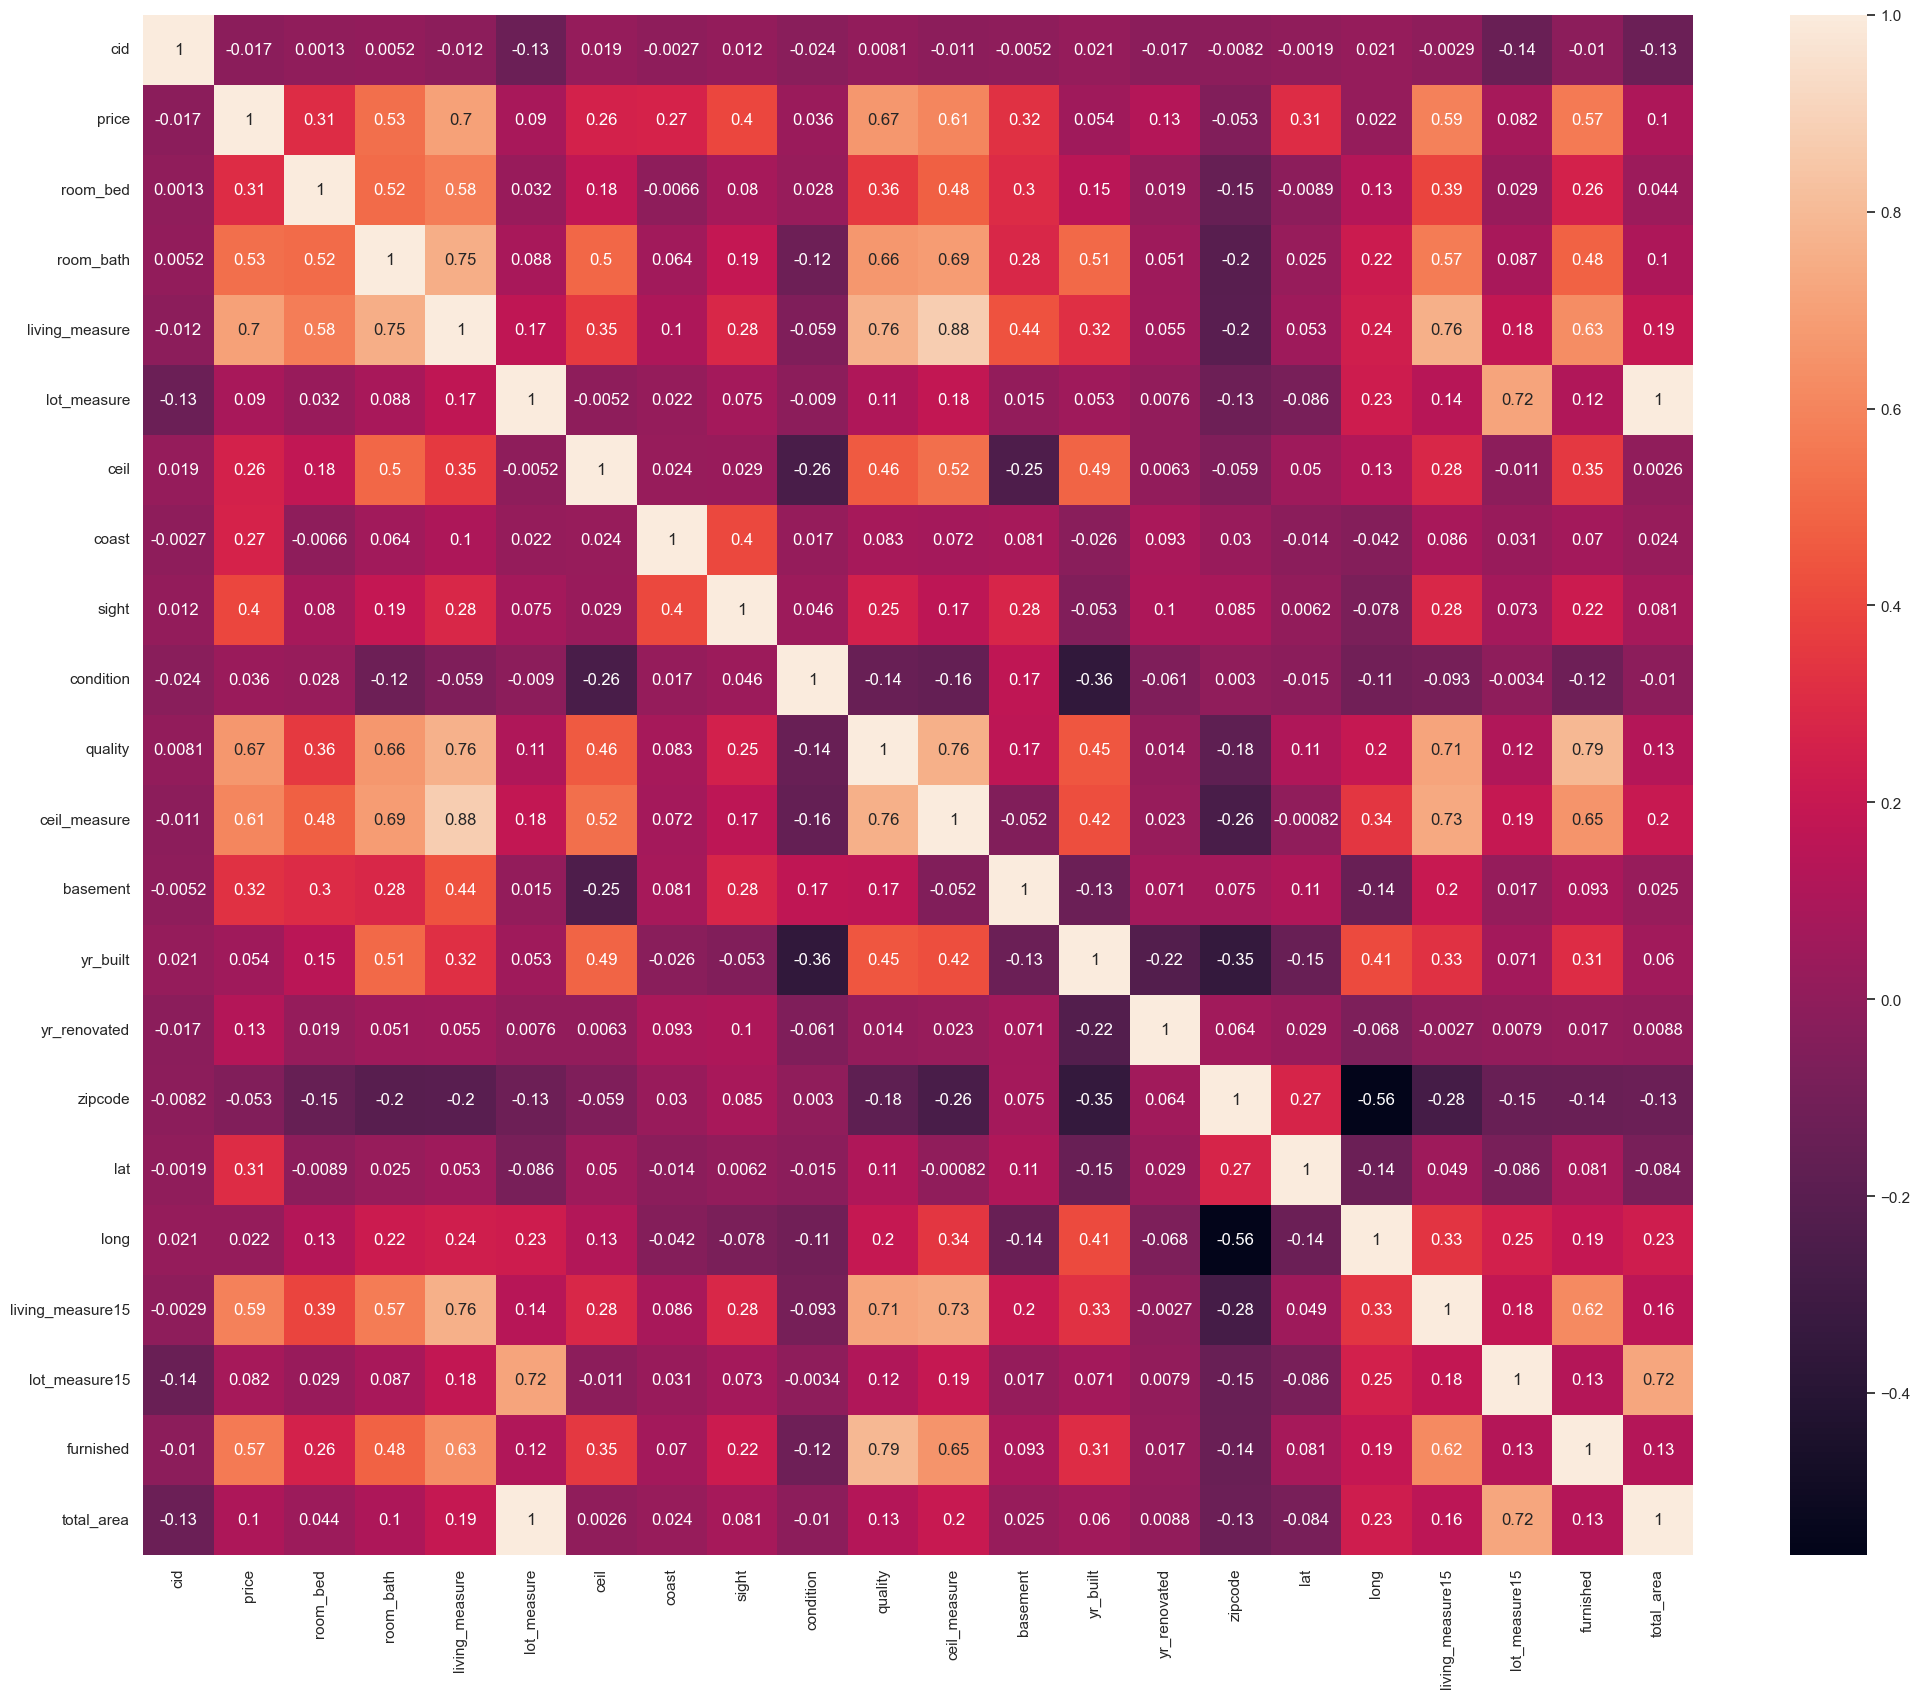

In [11]:
plt.figure(figsize=(25,20))
sns.heatmap(h.corr(),annot=True)
plt.show()

In [12]:
h['dayhours']= [x.strip().replace('T000000','') for x in h.dayhours]

In [13]:
h['dayhours'] = pd.to_datetime(h.dayhours)

In [14]:
h['year_sold'] = h.dayhours.dt.year

In [15]:

h_1 = h.drop(columns = 'dayhours')

In [16]:
h_1[h_1['room_bed'] == 33].index

Int64Index([750], dtype='int64')

In [17]:
h_1['room_bed']=h_1['room_bed'].astype('category')

In [18]:
h_1.drop(columns = 'cid',inplace=True)

In [19]:
h_1.drop(index=750,inplace=True)

In [20]:
h_1 = h_1.reset_index()
h_1.drop(columns='index',inplace=True)

In [21]:
h_1['room_bath']=h_1['room_bath'].astype('category')
h_1['ceil']=h_1['ceil'].astype('category')
h_1['coast']=h_1['coast'].astype('category')
h_1['sight']=h_1['sight'].astype('category')
h_1['condition']=h_1['condition'].astype('category')
h_1['quality']=h_1['quality'].astype('category')

In [22]:
h_1['have_basement'] = h_1['basement'].apply(lambda x: 0 if x==0 else 1)

In [23]:
h_1['Is_renovated'] = h_1['yr_renovated'].apply(lambda x: 0 if x==0 else 1)

In [24]:
h_1['Age_of_house'] = h_1['year_sold'] - h_1['yr_built']

In [25]:
lst = []
for i in h_1.lat:
    if i<47.255900:
        lst.append('ES')
    elif i>47.255900 and i<47.405900:
        lst.append('MS')
    elif i>47.405900 and i<47.555900:
        lst.append('MN')
    else:
        lst.append('EN')
h_1['SN_region'] = lst
h_1['SN_region'] = h_1['SN_region'].astype('category')

In [26]:
lst = []
for i in abs(h_1.long):
    if i<122.105000:
        lst.append('EE')
    elif i>122.105000 and i<122.205000:
        lst.append('ME')
    elif i>122.205000 and i<122.328000:
        lst.append('MW')
    else:
        lst.append('EW')
h_1['EW_region'] = lst
h_1['EW_region'] = h_1['EW_region'].astype('category')

In [27]:
delete_index = h_1[h_1['Age_of_house']== -1]['year_sold'].index
h_1.drop(index=delete_index,inplace = True)

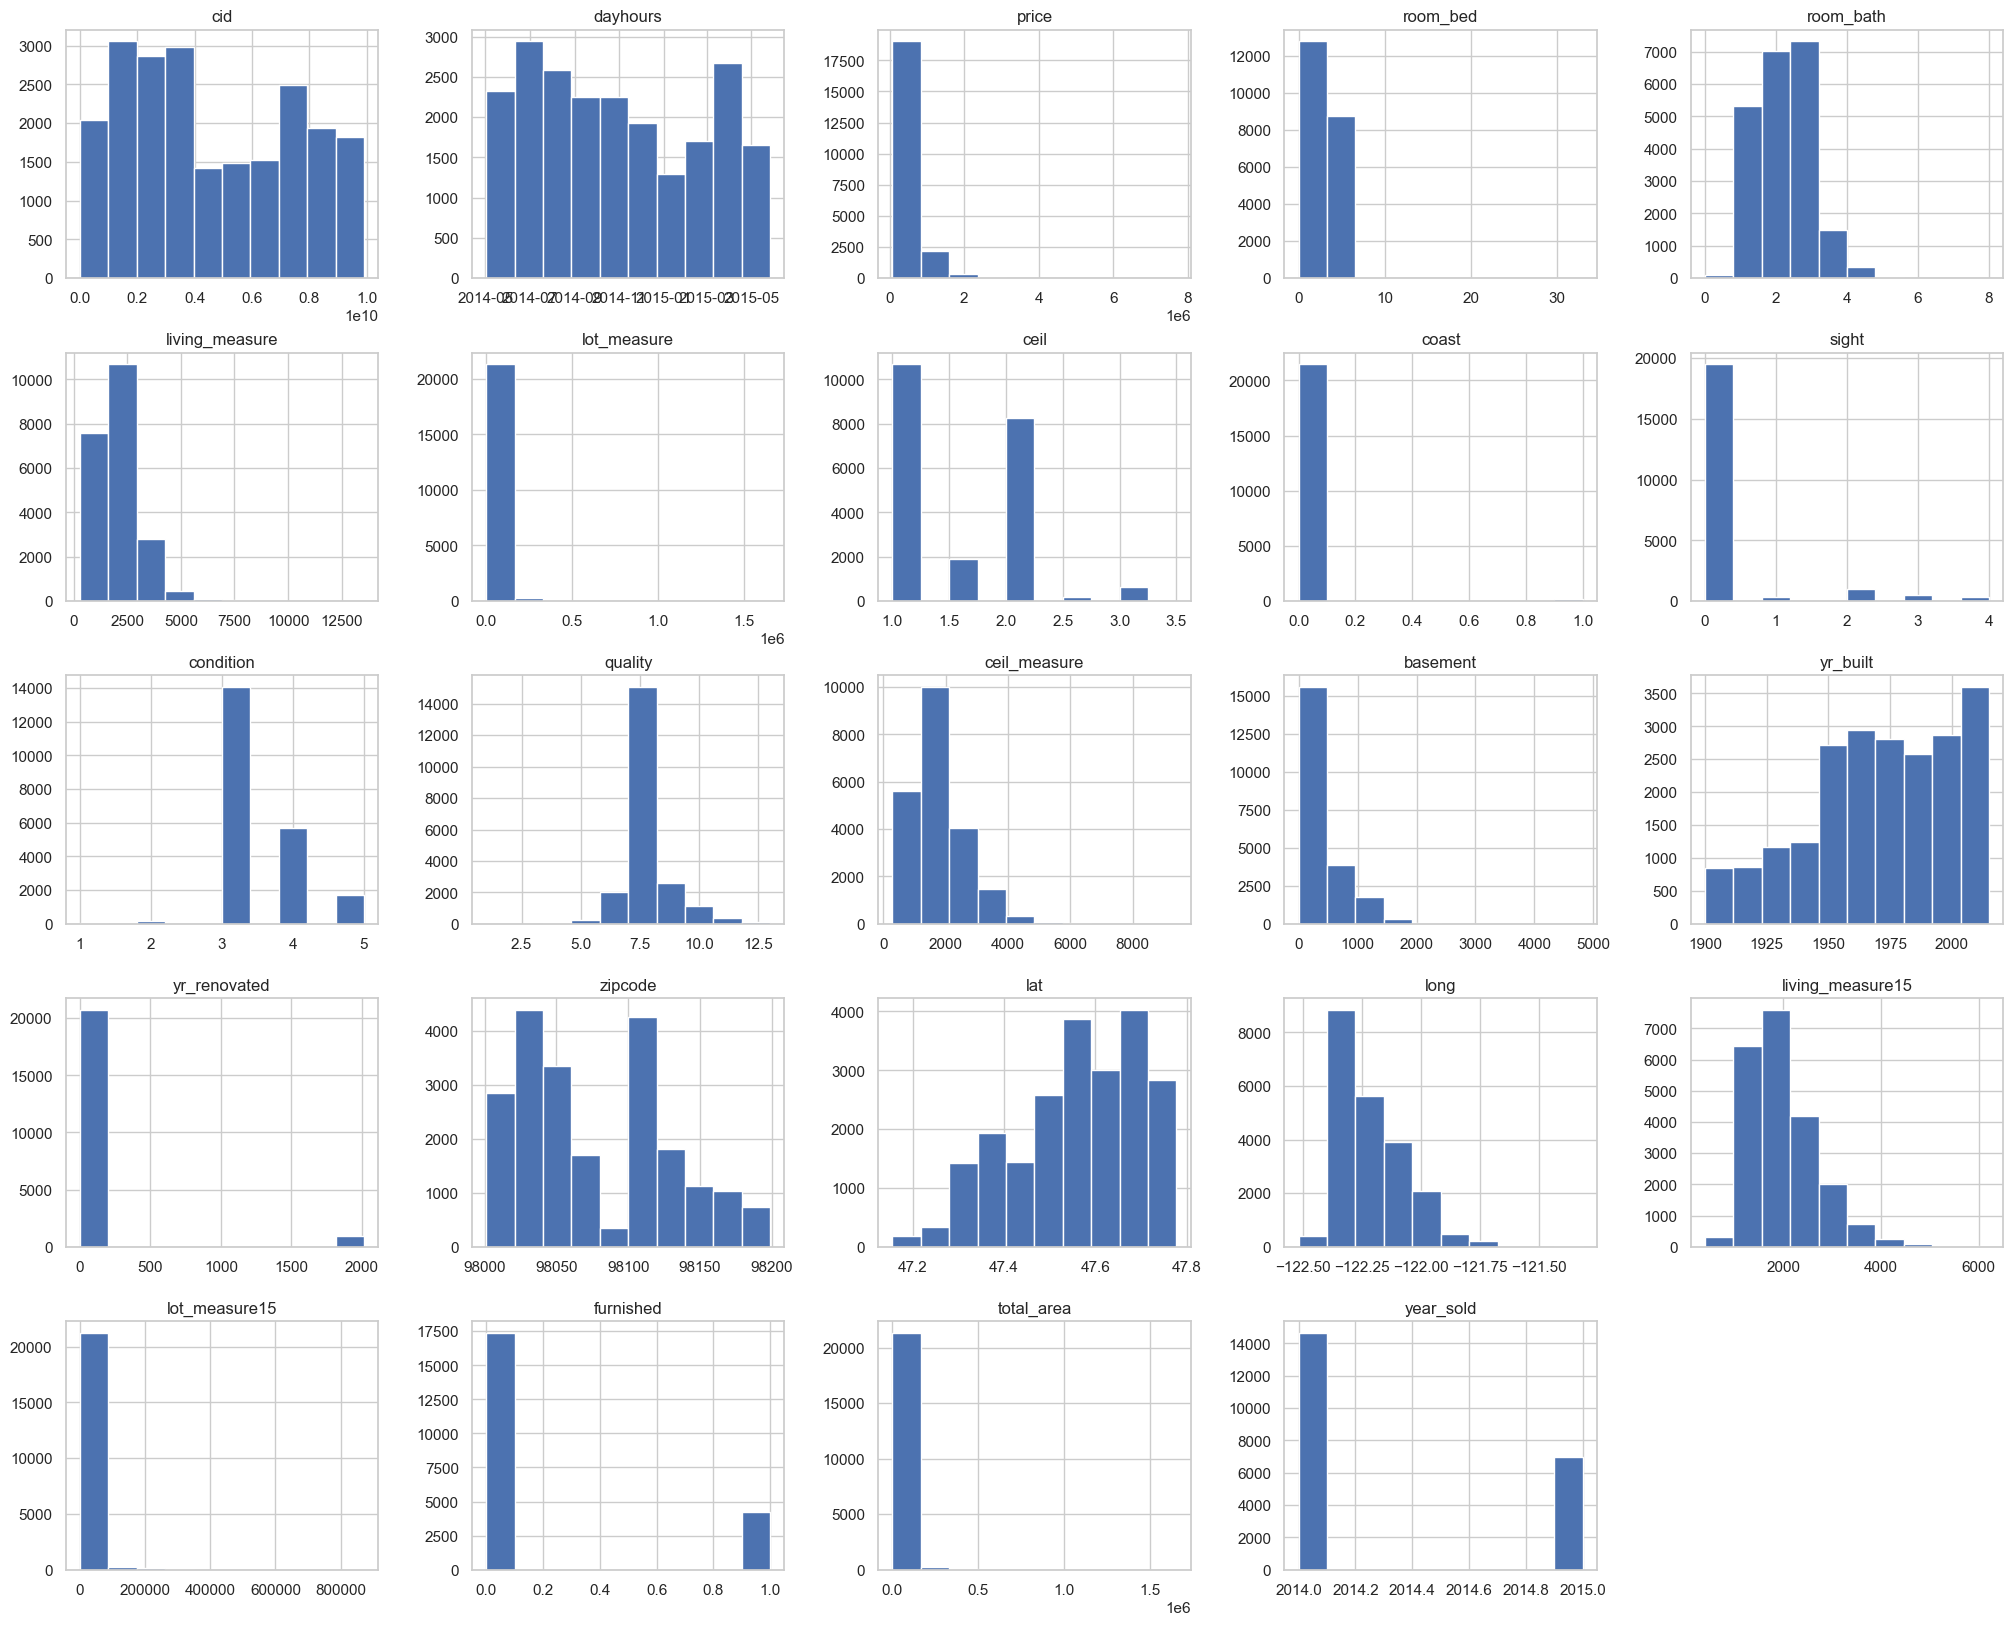

In [28]:
h.hist(figsize=(25,20))
plt.show()

In [29]:
list1 = ['dayhours','cid','price','room_bed', 'room_bath',
        'ceil', 'coast', 'sight', 'condition', 'quality',
        'furnished','zipcode']
h_def = h.drop(columns=list1)
def trend():
    for i in h_def.columns:
        h[[i,'price']].groupby([i]).sum().plot(figsize=(15,5))
        plt.show()

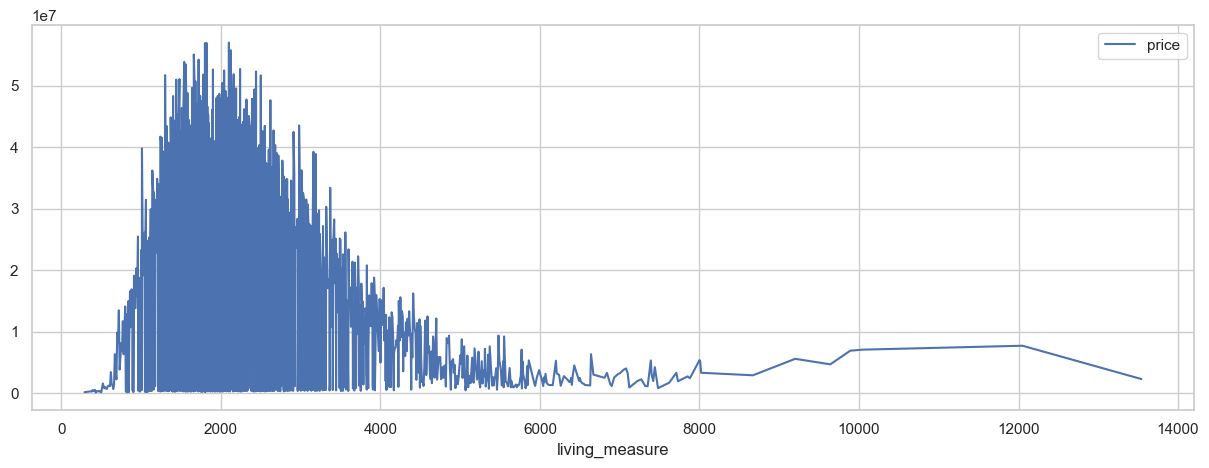

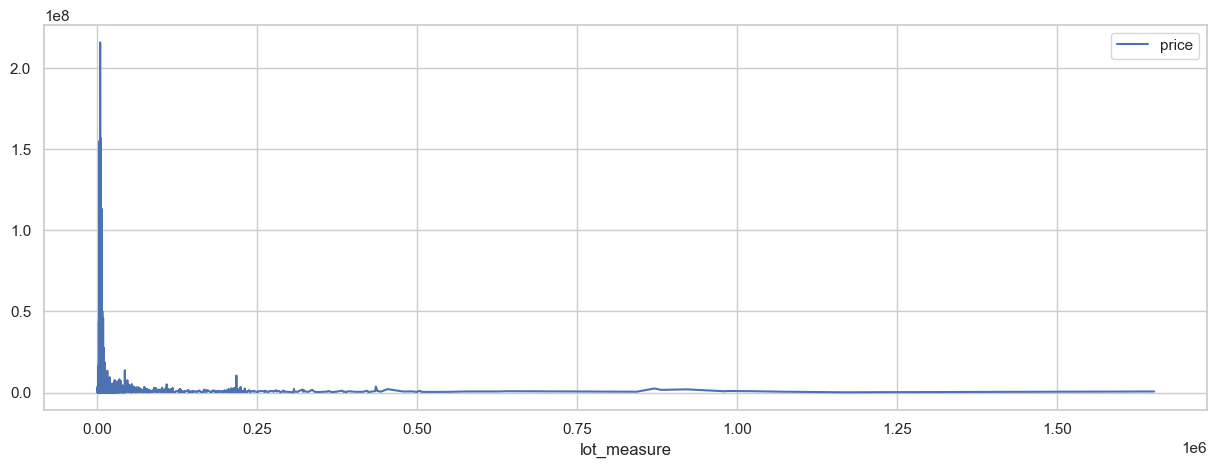

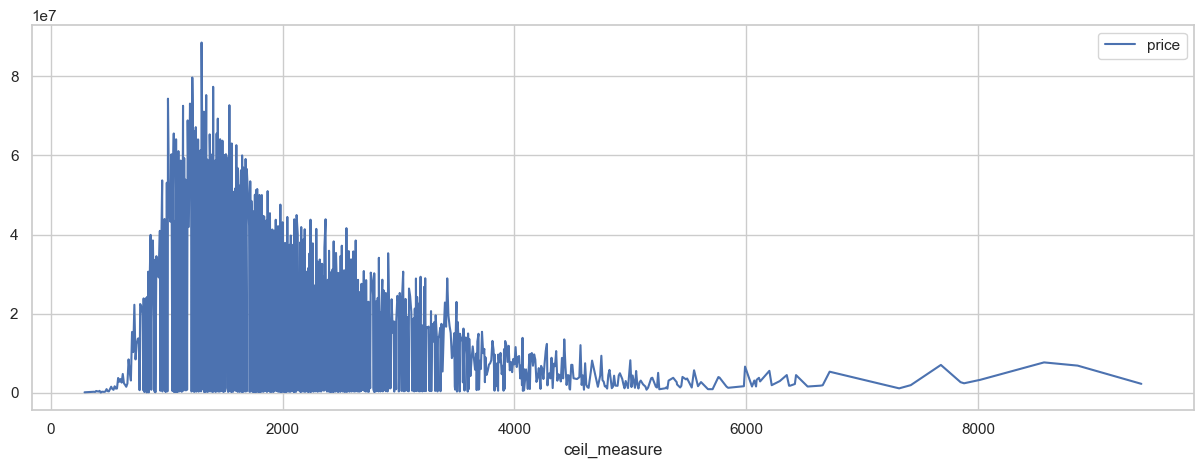

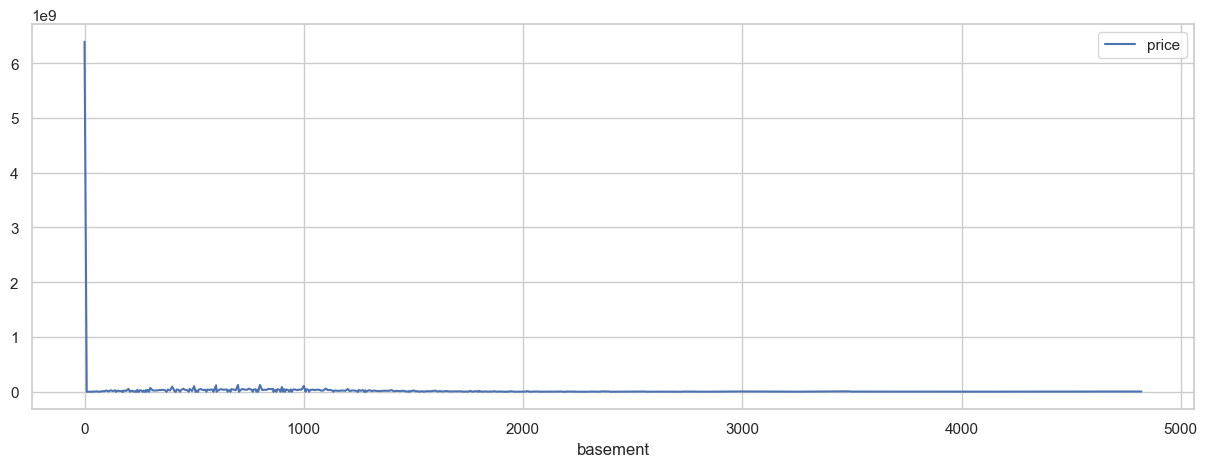

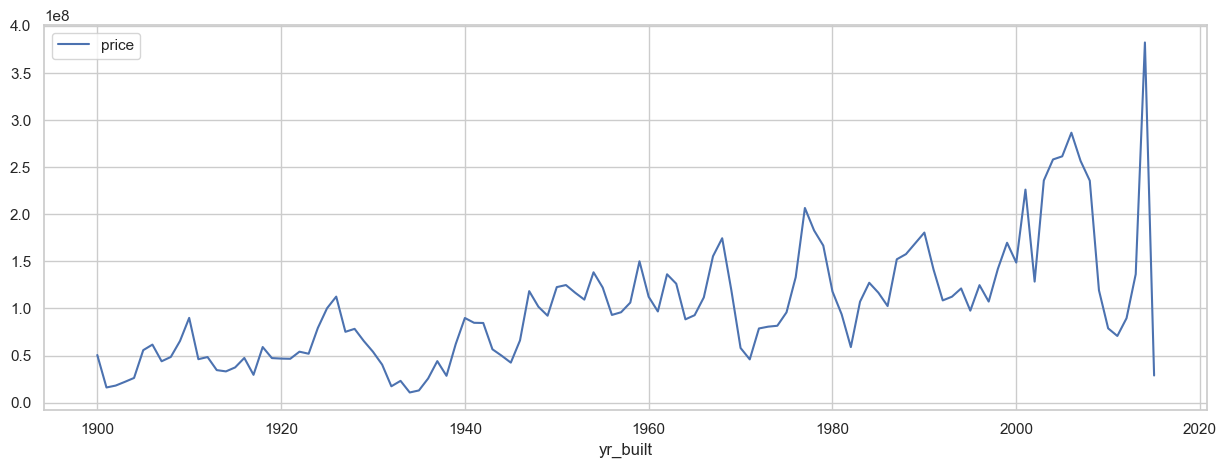

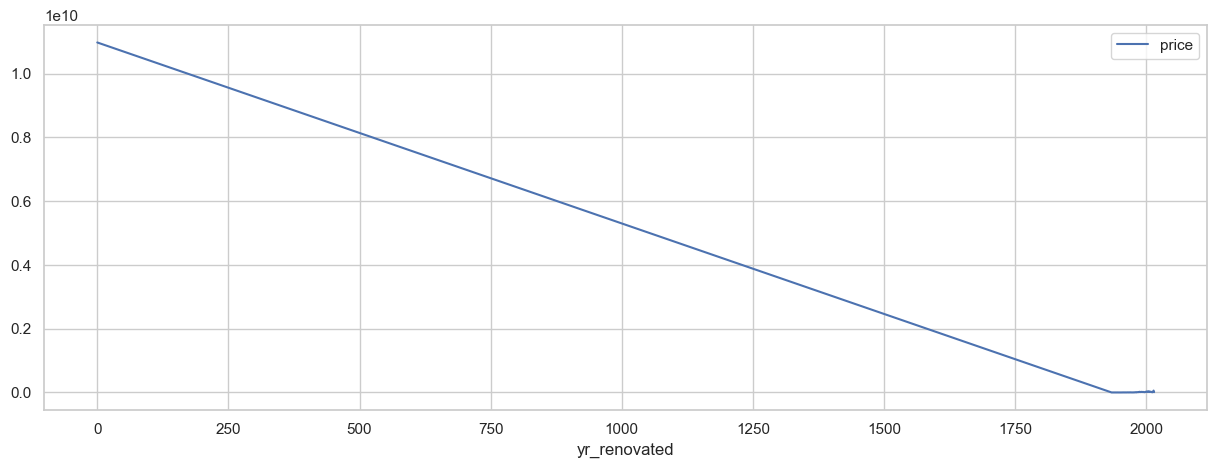

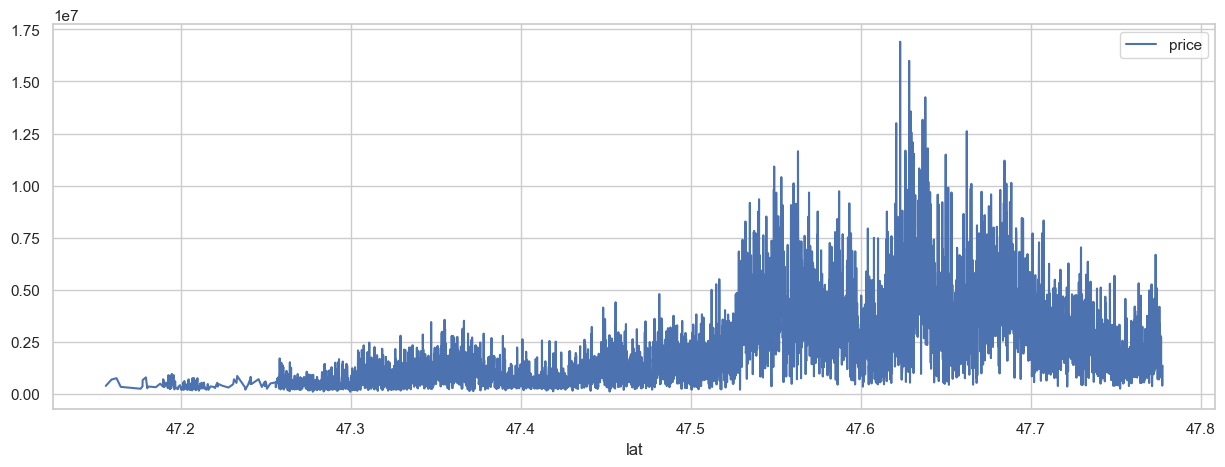

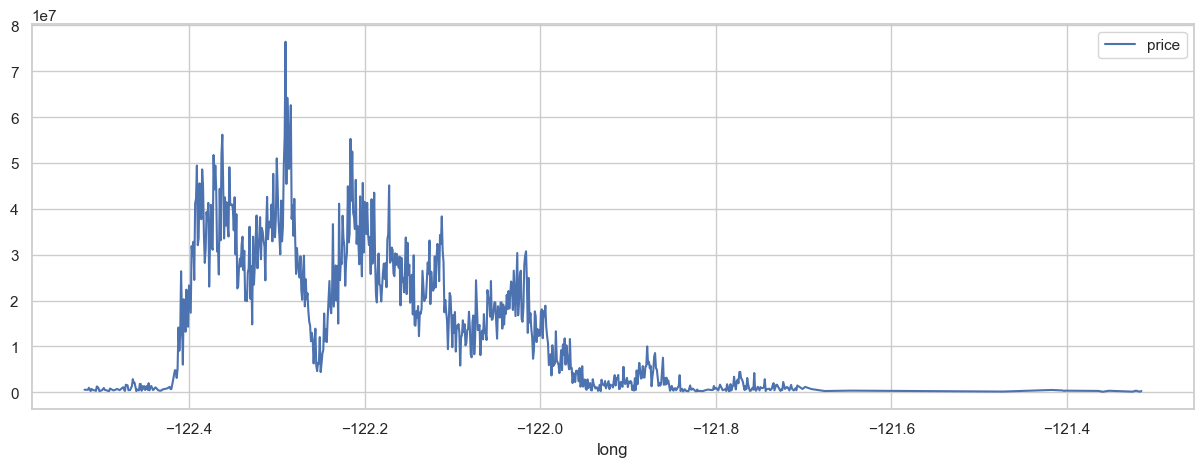

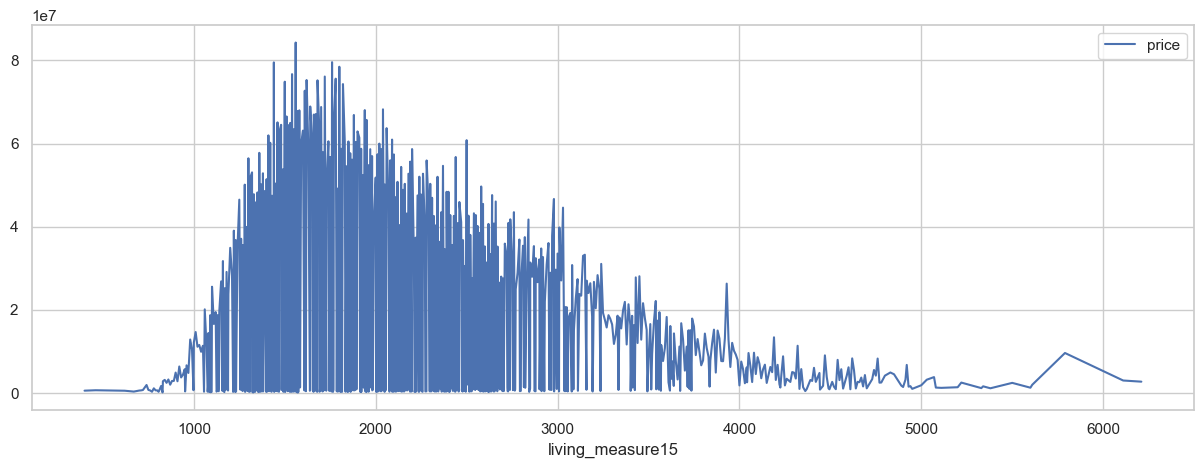

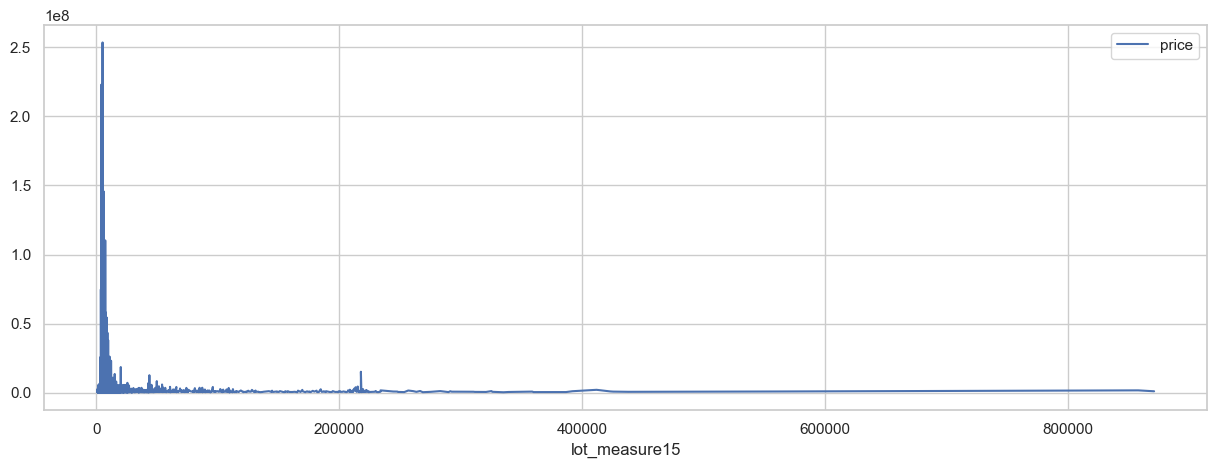

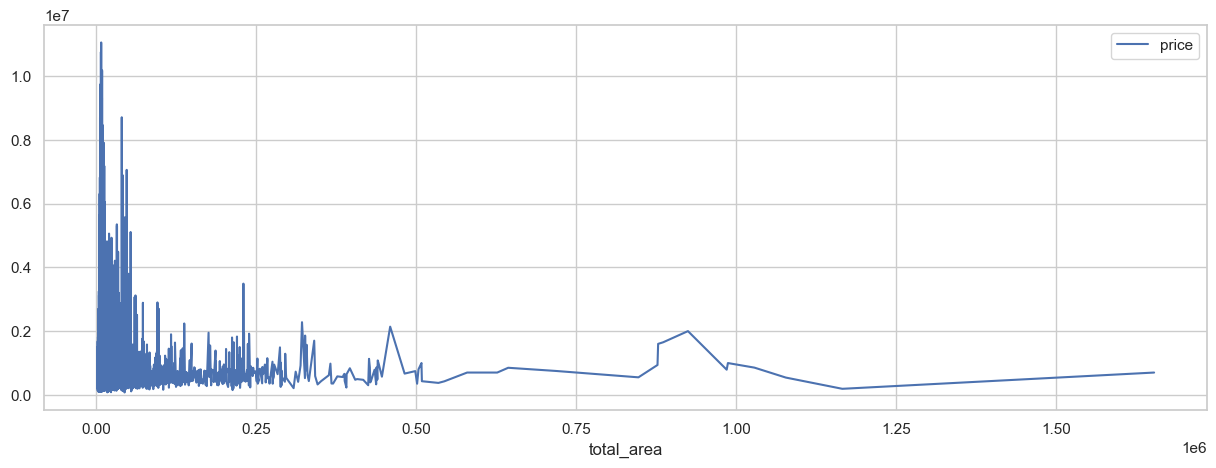

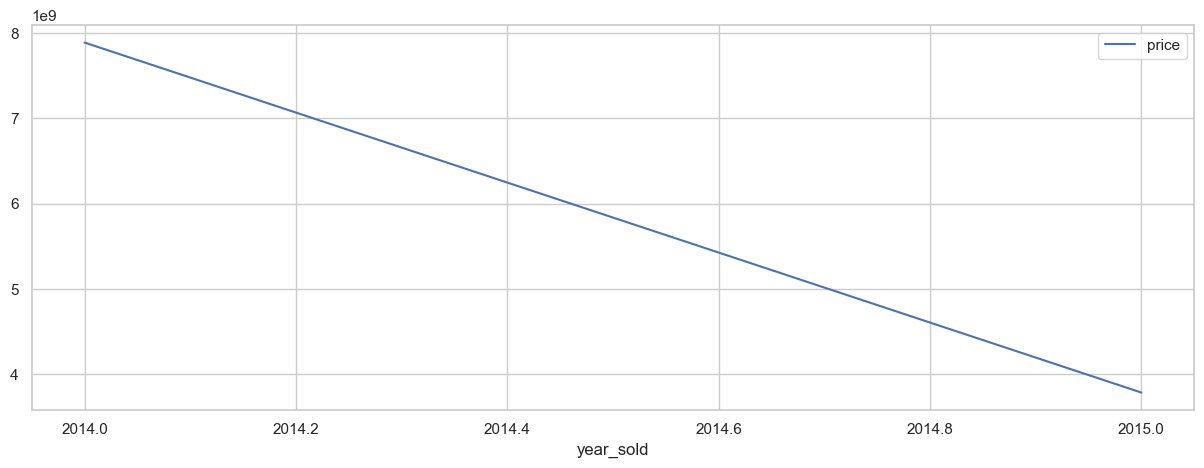

In [30]:
trend() 

In [31]:
list1 = ['dayhours','cid','price','room_bed', 'room_bath',
        'ceil', 'coast', 'sight', 'condition', 'quality',
        'furnished','zipcode','year_sold','yr_renovated','lat','long']
h_def = h.drop(columns=list1)
def scatterr():
    for i in h_def.columns:
        plt.figure(figsize=(15,5))
        sns.regplot(x='price',y=i, data=h, color='#79d13e')
        plt.show()

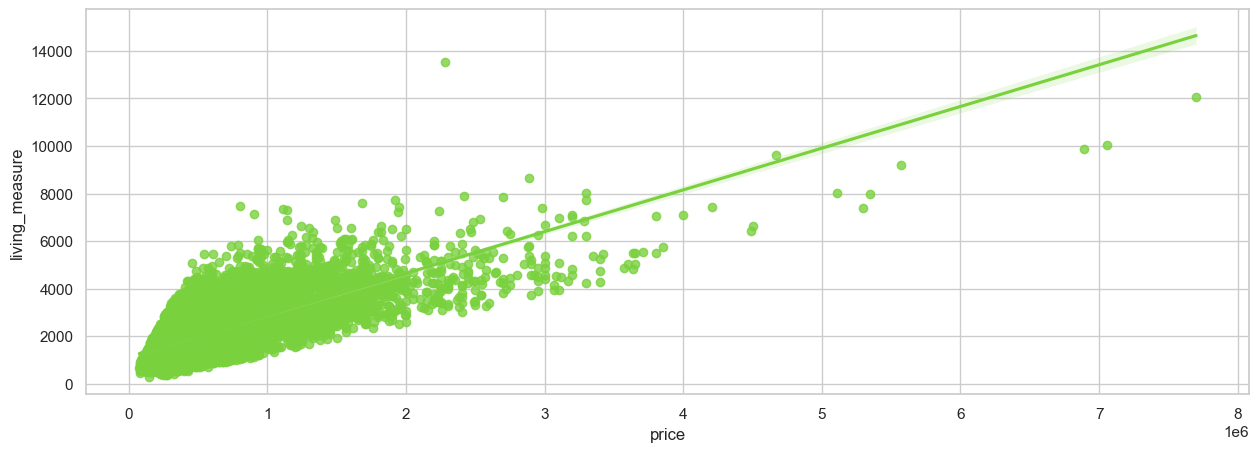

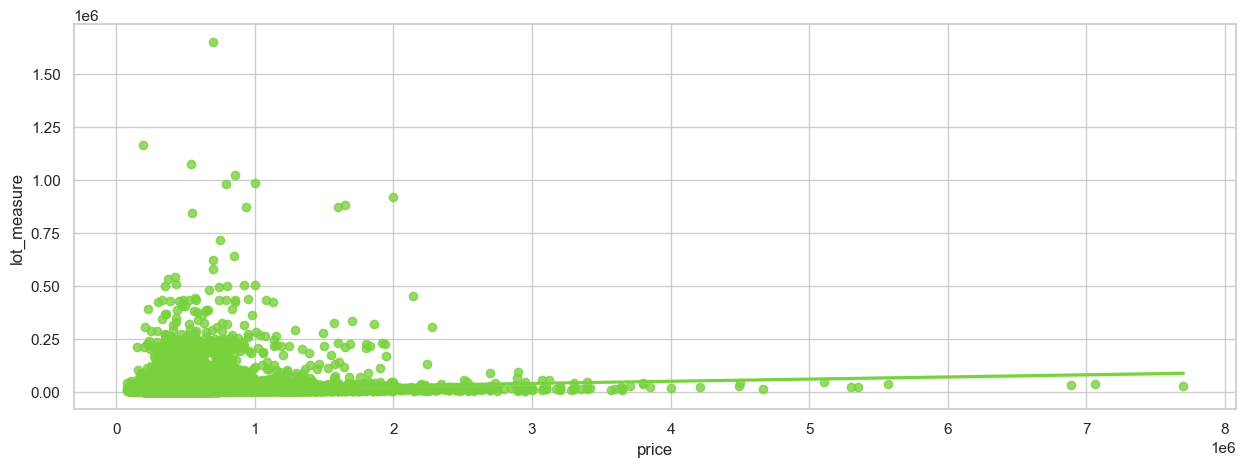

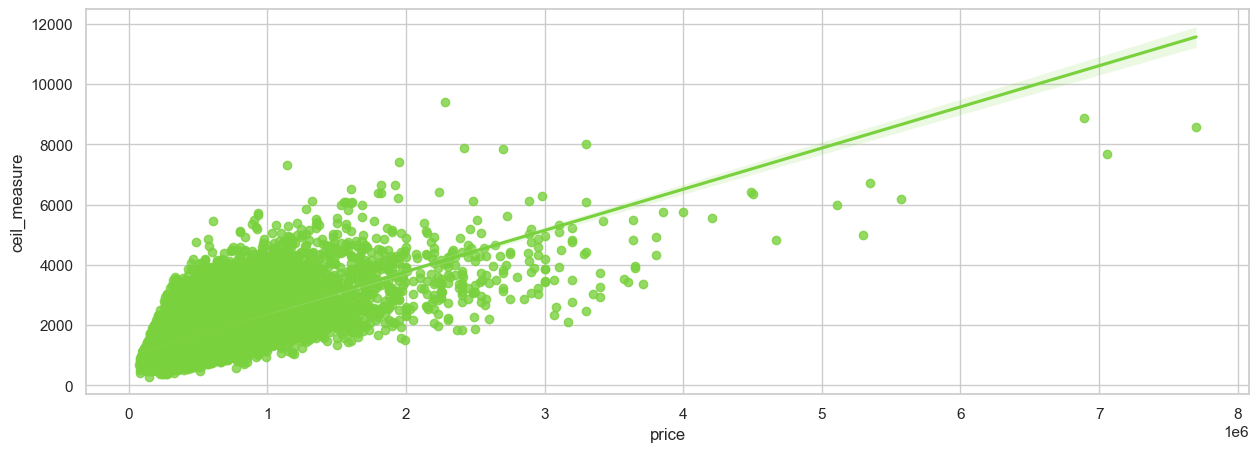

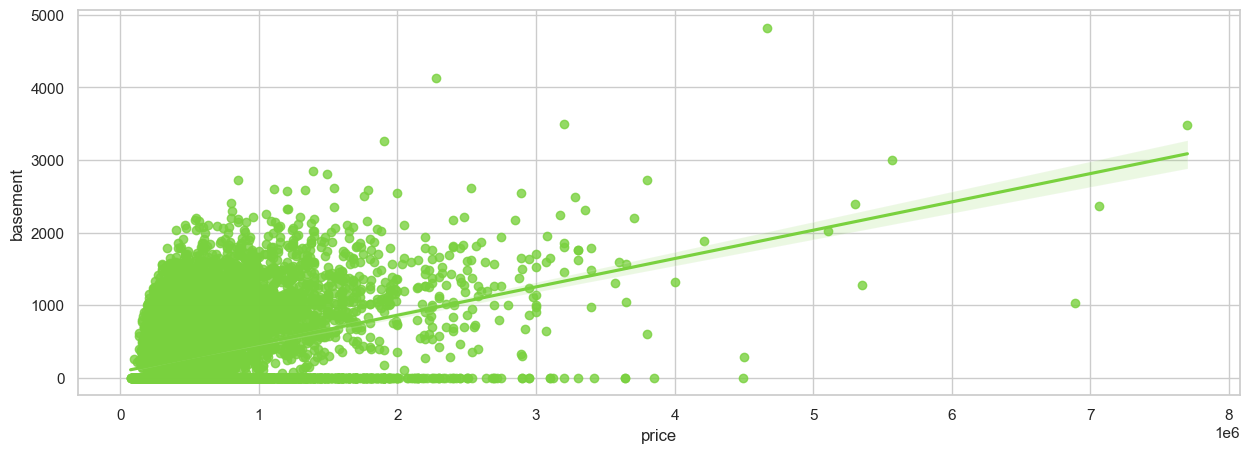

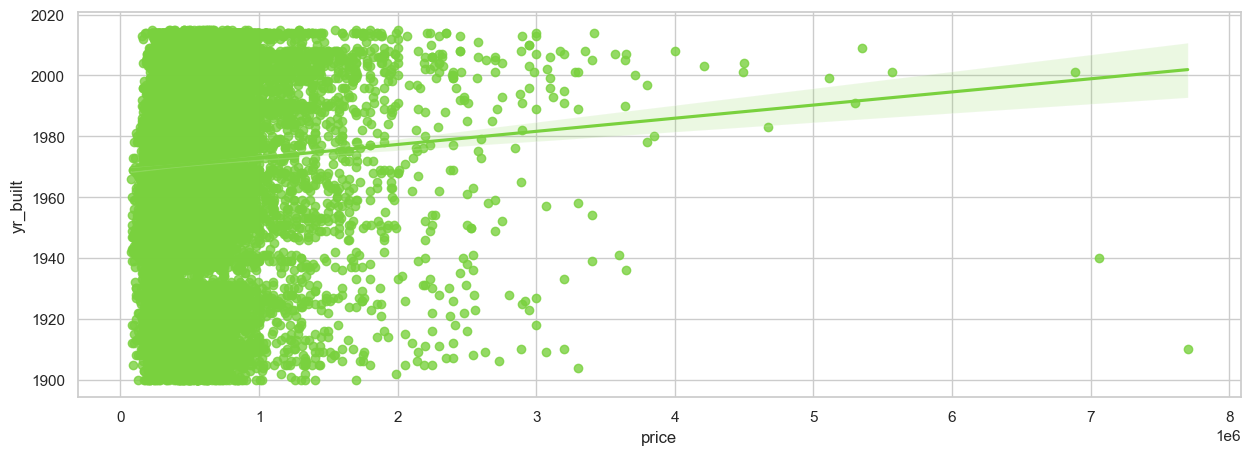

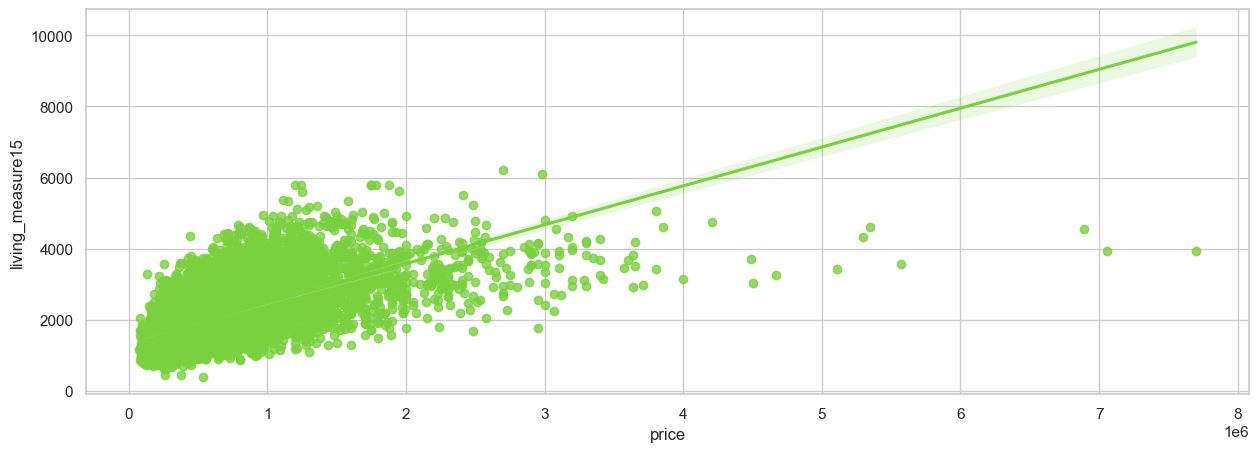

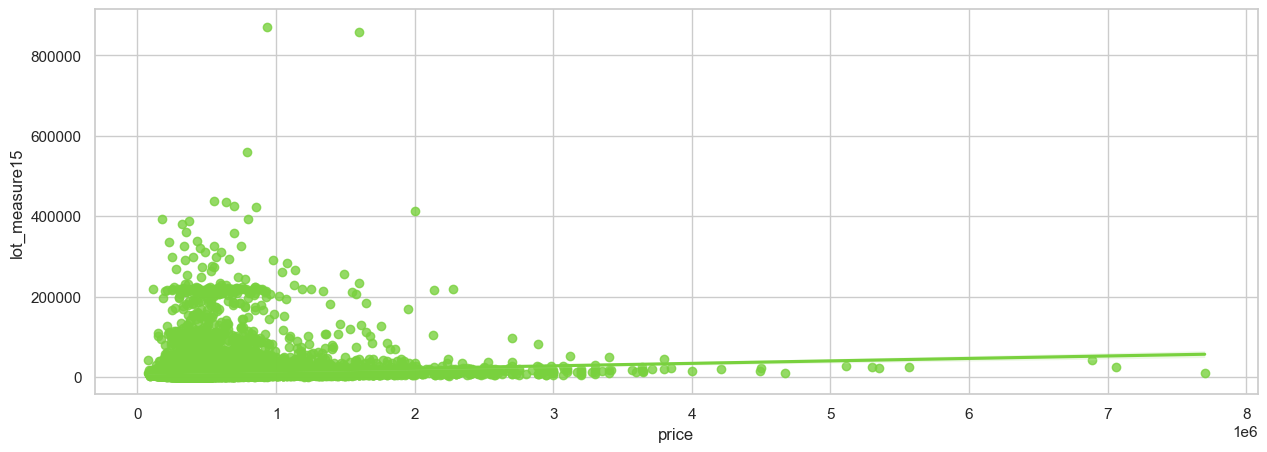

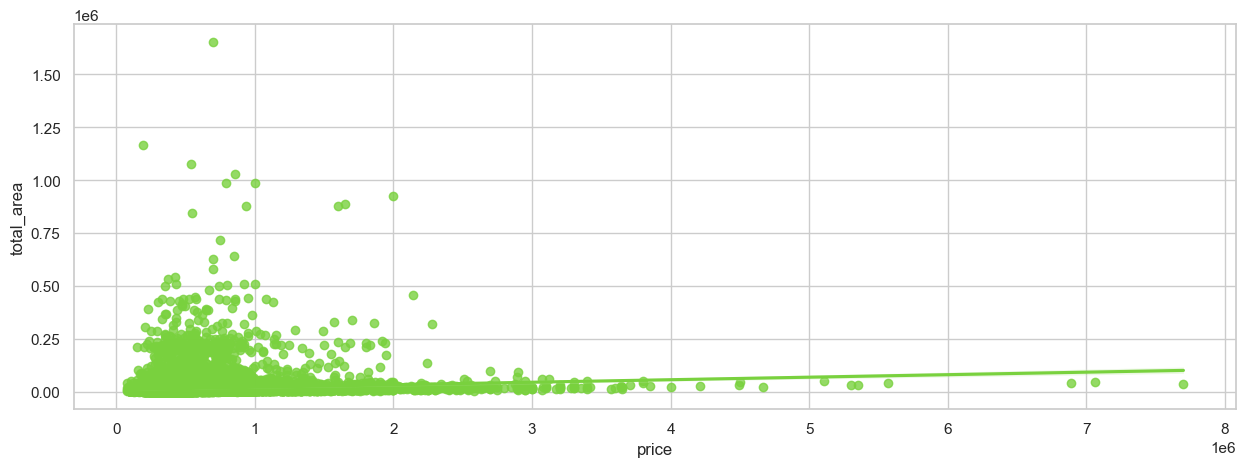

In [32]:
scatterr()

In [33]:
h_1.shape

(21600, 27)

In [34]:
h_1.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area',
       'year_sold', 'have_basement', 'Is_renovated', 'Age_of_house',
       'SN_region', 'EW_region'],
      dtype='object')

In [35]:
details(h_1)

,Null Values,Data Type,No. of Unique Values
price,0,int64,3622
room_bed,0,category,12
room_bath,0,category,30
living_measure,0,int64,1038
lot_measure,0,int64,9779
ceil,0,category,6
coast,0,category,2
sight,0,category,5
condition,0,category,5
quality,0,category,12


drop columns :

basement : as the data is already in ceil measure and living measure

yr_built : data is in age of house

yr_renovated : is renovated new column

total_area : ambiguous column

lat, long : made catogorical columns

year_sold : data in age of house

In [36]:
data = h_1.copy()

In [37]:
dummy_data = pd.get_dummies(data)

In [38]:
dummy_data.shape

(21600, 99)

In [39]:
for i in dummy_data.columns:
    print(i)

price
living_measure
lot_measure
ceil_measure
basement
yr_built
yr_renovated
zipcode
lat
long
living_measure15
lot_measure15
furnished
total_area
year_sold
have_basement
Is_renovated
Age_of_house
room_bed_0
room_bed_1
room_bed_2
room_bed_3
room_bed_4
room_bed_5
room_bed_6
room_bed_7
room_bed_8
room_bed_9
room_bed_10
room_bed_11
room_bed_33
room_bath_0.0
room_bath_0.5
room_bath_0.75
room_bath_1.0
room_bath_1.25
room_bath_1.5
room_bath_1.75
room_bath_2.0
room_bath_2.25
room_bath_2.5
room_bath_2.75
room_bath_3.0
room_bath_3.25
room_bath_3.5
room_bath_3.75
room_bath_4.0
room_bath_4.25
room_bath_4.5
room_bath_4.75
room_bath_5.0
room_bath_5.25
room_bath_5.5
room_bath_5.75
room_bath_6.0
room_bath_6.25
room_bath_6.5
room_bath_6.75
room_bath_7.5
room_bath_7.75
room_bath_8.0
ceil_1.0
ceil_1.5
ceil_2.0
ceil_2.5
ceil_3.0
ceil_3.5
coast_0
coast_1
sight_0
sight_1
sight_2
sight_3
sight_4
condition_1
condition_2
condition_3
condition_4
condition_5
quality_1
quality_3
quality_4
quality_5
quality_6
qual

In [40]:
drop_list = ['lat','long','zipcode','yr_built','year_sold','yr_renovated','basement','total_area',
'room_bed_33']

In [41]:
dummy_data.drop(columns=drop_list,inplace =True)

In [42]:
dummy_data.shape

(21600, 90)

In [43]:
x = dummy_data.drop(columns='price')
y = dummy_data.price

In [44]:
dummy_data.corr()['price']

price               1.000000
living_measure      0.702307
lot_measure         0.089631
ceil_measure        0.605737
living_measure15    0.585404
                      ...   
SN_region_MS       -0.281826
EW_region_EE        0.011036
EW_region_EW       -0.038585
EW_region_ME       -0.007324
EW_region_MW        0.033460
Name: price, Length: 90, dtype: float64

In [45]:
details(dummy_data)

,Null Values,Data Type,No. of Unique Values
price,0,int64,3622
living_measure,0,int64,1038
lot_measure,0,int64,9779
ceil_measure,0,int64,946
living_measure15,0,int64,777
...,...,...,...
SN_region_MS,0,uint8,2
EW_region_EE,0,uint8,2
EW_region_EW,0,uint8,2
EW_region_ME,0,uint8,2


In [46]:
x = dummy_data.drop(columns='price')
y = dummy_data.price

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 100) 

In [48]:
import statsmodels.api as sm
X_train=sm.add_constant(x_train)# Add constant X
X_test = sm.add_constant(x_test)
ols_model=sm.OLS(y_train,X_train).fit()
residuals = ols_model.resid
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     599.9
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:59:38   Log-Likelihood:            -2.0473e+05
No. Observations:               15120   AIC:                         4.096e+05
Df Residuals:                   15041   BIC:                         4.102e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.625e+05   1.82e+04     14.451      0.000    2.27e+05    2.98e+05
living_measure     110.8819      7.013     15.812      0.000      97.136     124.628
lot_measure          0.2012      0.053      3.774      0.000       0.097       0.306
ceil_measure        24.3625      7.784      3.130      0.002       9.105      39.620
living_measure15    40.5712      3.887     10.437      0.000      32.952      48.191
lot_measure15       -0.5185      0.080     -6.482      0.000      -0.675      -0.362
furnished         5.269e+05   3.31e+04     15.917      0.000    4.62e+05    5.92e+05
have_basement     6479.4925   5947.592      1.089      0.276   -5178.511    1.81e+04
Is_renovated      8.145e+04   8074.026     10.088      0.000    6.56e+04    9.73e+04
Age_of_house      1170.5432     90.850     12.884      0.000     992.466    1348.621
room_bed_0        1.259e+05   7.31e+04      1.724      0.085   -1.73e+04    2.69e+05
room_bed_1        6.658e+04   2.36e+04      2.823      0.005    2.04e+04    1.13e+05
room_bed_2        7.753e+04   1.88e+04      4.123      0.000    4.07e+04    1.14e+05
room_bed_3        6.898e+04   1.84e+04      3.752      0.000    3.29e+04    1.05e+05
room_bed_4        4.486e+04   1.84e+04      2.442      0.015    8847.902    8.09e+04
room_bed_5         3.81e+04   1.88e+04      2.026      0.043    1229.888     7.5e+04
room_bed_6        7374.7178   2.19e+04      0.337      0.736   -3.55e+04    5.02e+04
room_bed_7       -1.044e+04   3.64e+04     -0.286      0.775   -8.19e+04     6.1e+04
room_bed_8         1.11e+05   5.97e+04      1.859      0.063   -6049.915    2.28e+05
room_bed_9       -1.421e+05   9.91e+04     -1.433      0.152   -3.36e+05    5.22e+04
room_bed_10      -1.253e+05   1.23e+05     -1.022      0.307   -3.66e+05    1.15e+05
room_bed_11      -1.564e-09   5.62e-10     -2.782      0.005   -2.67e-09   -4.62e-10
room_bath_0.0    -2.909e+05   1.03e+05     -2.818      0.005   -4.93e+05   -8.86e+04
room_bath_0.5    -4.356e+05   1.28e+05     -3.406      0.001   -6.86e+05   -1.85e+05
room_bath_0.75   -3.345e+05   3.45e+04     -9.696      0.000   -4.02e+05   -2.67e+05
room_bath_1.0    -2.968e+05   2.09e+04    -14.213      0.000   -3.38e+05   -2.56e+05
room_bath_1.25   -3.479e+05   7.55e+04     -4.609      0.000   -4.96e+05      -2e+05
room_bath_1.5    -2.996e+05   2.09e+04    -14.367      0.000    -3.4e+05   -2.59e+05
room_bath_1.75   -2.953e+05   2.03e+04    -14.540      0.000   -3.35e+05   -2.55e+05
room_bath_2.0    -2.912e+05   2.05e+04    -14.234      0.000   -3.31e+05   -2.51e+05
room_bath_2.25   -2.758e+05   2.02e+04    -13.670      0.000   -3.15e+05   -2.36e+05
room_bath_2.5    -2.849e+05   1.97e+04    -14.459      0.000   -3.24e+05   -2.46e+05
room_bath_2.75   -2.891e+05   2.03e+04    -14.268      0.000   -3.29e+05   -2.49e+05
room_bath_3.0    -2.645

In [49]:
x = dummy_data[['SN_region_MS', 'living_measure', 'sight_4', 'SN_region_EN', 'furnished', 'quality_9', 'quality_10', 'Age_of_house', 'coast_1', 'quality_13', 'sight_0', 'quality_12', 'quality_8', 'room_bath_7.75', 'EW_region_EE', 'condition_5', 'Is_renovated', 'condition_4', 'room_bath_6.0', 'EW_region_MW', 'living_measure15', 'EW_region_EW', 'room_bath_4.75', 'room_bath_8.0', 'ceil_2.5', 'quality_7', 'room_bath_4.25', 'room_bath_3.25', 'room_bath_5.5', 'room_bath_3.75', 'room_bath_5.25', 'room_bath_5.0', 'room_bath_4.5', 'room_bath_4.0', 'quality_11', 'sight_2', 'lot_measure15', 'room_bath_3.5', 'room_bed_4', 'room_bed_6', 'ceil_1.0', 'room_bed_7', 'room_bath_5.75', 'room_bed_5', 'SN_region_ES', 'room_bath_3.0', 'lot_measure', 'room_bath_6.25', 'room_bath_2.25', 'ceil_measure', 'room_bath_6.75']]
x = x.drop(columns='ceil_1.0')
y = dummy_data.price

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 100) 

In [51]:
import statsmodels.api as sm
X_train=sm.add_constant(x_train)# Add constant X
X_test = sm.add_constant(x_test)
ols_model=sm.OLS(y_train,X_train).fit()
residuals = ols_model.resid
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     953.8
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:59:38   Log-Likelihood:            -2.0474e+05
No. Observations:               15120   AIC:                         4.096e+05
Df Residuals:                   15070   BIC:                         4.100e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.423e+04    1.3e+04      1.865      0.062   -1240.059    4.97e+04
SN_region_MS      -9.65e+04   4756.568    -20.287      0.000   -1.06e+05   -8.72e+04
living_measure     115.4800      4.470     25.832      0.000     106.717     124.243
sight_4           9.664e+04    1.7e+04      5.672      0.000    6.32e+04     1.3e+05
SN_region_EN      1.519e+05   3662.527     41.483      0.000    1.45e+05    1.59e+05
furnished         6.137e+05   1.66e+04     36.933      0.000    5.81e+05    6.46e+05
quality_9        -3.982e+05   1.46e+04    -27.332      0.000   -4.27e+05    -3.7e+05
quality_10        -2.58e+05   1.47e+04    -17.497      0.000   -2.87e+05   -2.29e+05
Age_of_house      1079.6928     76.254     14.159      0.000     930.226    1229.160
coast_1           5.715e+05   2.16e+04     26.421      0.000    5.29e+05    6.14e+05
quality_13        9.951e+05   6.22e+04     15.986      0.000    8.73e+05    1.12e+06
sight_0          -1.153e+05   8153.853    -14.141      0.000   -1.31e+05   -9.93e+04
quality_12        3.342e+05   2.43e+04     13.776      0.000    2.87e+05    3.82e+05
quality_8         1.053e+05   6858.274     15.360      0.000    9.19e+04    1.19e+05
room_bath_7.75    3.515e+06   2.01e+05     17.530      0.000    3.12e+06    3.91e+06
EW_region_EE     -1.839e+04   4749.334     -3.872      0.000   -2.77e+04   -9082.516
condition_5       9.148e+04   6128.988     14.926      0.000    7.95e+04    1.03e+05
Is_renovated      8.437e+04   7932.836     10.636      0.000    6.88e+04    9.99e+04
condition_4       3.977e+04   3788.223     10.498      0.000    3.23e+04    4.72e+04
room_bath_6.0     1.032e+06   9.48e+04     10.887      0.000    8.46e+05    1.22e+06
EW_region_MW      4.629e+04   4478.601     10.337      0.000    3.75e+04    5.51e+04
living_measure15    40.7182      3.835     10.616      0.000      33.200      48.236
EW_region_EW      3.126e+04   4813.605      6.493      0.000    2.18e+04    4.07e+04
room_bath_4.75    4.693e+05    4.9e+04      9.569      0.000    3.73e+05    5.65e+05
room_bath_8.0     1.548e+06   1.41e+05     11.009      0.000    1.27e+06    1.82e+06
ceil_2.5           1.05e+05   1.76e+04      5.953      0.000    7.04e+04     1.4e+05
quality_7         4.363e+04   5633.664      7.745      0.000    3.26e+04    5.47e+04
room_bath_4.25    2.331e+05    2.6e+04      8.968      0.000    1.82e+05    2.84e+05
room_bath_3.25    9.991e+04   9809.468     10.185      0.000    8.07e+04    1.19e+05
room_bath_5.5      5.06e+05   7.21e+04      7.023      0.000    3.65e+05    6.47e+05
room_bath_3.75    1.045e+05   1.83e+04      5.712      0.000    6.86e+04     1.4e+05
room_bath_5.25    3.707e+05   5.67e+04      6.542      0.000     2.6e+05    4.82e+05
room_bath_5.0     3.873e+05   4.47e+04      8.667      0.000       3e+05    4.75e+05
room_bath_4.5     1.799

In [52]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
print(coefficients)
print(lm.intercept_)
li_y_pred=lm.predict(x_test)

                   0             0
0       SN_region_MS -9.649782e+04
1     living_measure  1.154800e+02
2            sight_4  9.663797e+04
3       SN_region_EN  1.519315e+05
4          furnished  6.136983e+05
5          quality_9 -3.981560e+05
6         quality_10 -2.580219e+05
7       Age_of_house  1.079693e+03
8            coast_1  5.714989e+05
9         quality_13  9.951286e+05
10           sight_0 -1.153041e+05
11        quality_12  3.342377e+05
12         quality_8  1.053463e+05
13    room_bath_7.75  3.515241e+06
14      EW_region_EE -1.839179e+04
15       condition_5  9.148205e+04
16      Is_renovated  8.437301e+04
17       condition_4  3.976935e+04
18     room_bath_6.0  1.031718e+06
19      EW_region_MW  4.629314e+04
20  living_measure15  4.071817e+01
21      EW_region_EW  3.125659e+04
22    room_bath_4.75  4.693171e+05
23     room_bath_8.0  1.547758e+06
24          ceil_2.5  1.049533e+05
25         quality_7  4.363425e+04
26    room_bath_4.25  2.331206e+05
27    room_bath_3.25

In [53]:
import numpy as np
y_test = pd.to_numeric(y_test, errors='coerce')
RSS = np.sum((li_y_pred - y_test)**2)
y_mean = np.mean(y_test)
TSS = np.sum((y_test - y_mean)**2)
R2 = 1 - RSS/TSS
print('R Squared',R2)

n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R squared',adj_rsquared)
print(" Root Mean Squared Error: %.4f"
      % np.sqrt(np.mean((li_y_pred - y_test) ** 2)))

R Squared 0.7591555165533685
Adjusted R squared 0.7572824065561168
 Root Mean Squared Error: 174435.1687


In [54]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)


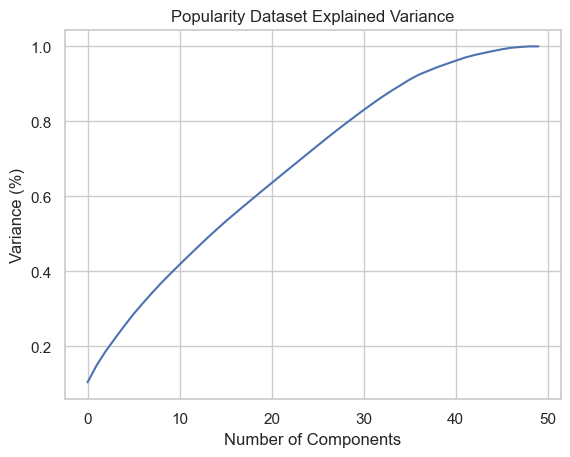

In [55]:
from sklearn.decomposition import PCA
#Fitting the PCA algorithm with our Data
pca = PCA()
model_pca = pca.fit(x_train_scaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(model_pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Popularity Dataset Explained Variance')
plt.show()

In [56]:
model_pca = PCA(n_components=46,svd_solver='full')

In [57]:
new_train = model_pca.fit_transform(x_train_scaled)
new_test  = model_pca.transform(x_test_scaled)

In [58]:
import pandas as pd
import pylab as pl
from sklearn.decomposition import PCA

# Dump components relations with features:
pd.DataFrame(model_pca.components_,columns=x_train.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10',
                                                                   'PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17','PC-18','PC-19','PC-20',
                                                                   'PC-21','PC-22','PC-23','PC-24','PC-25','PC-26','PC-27','PC-28','PC-29','PC-30',
                                                                   'PC-31','PC-32','PC-33','PC-34','PC-35','PC-36','PC-37','PC-38','PC-39','PC-40',
                                                                   'PC-41','PC-42','PC-43','PC-44','PC-45','PC-46'])

,SN_region_MS,living_measure,sight_4,SN_region_EN,furnished,quality_9,quality_10,Age_of_house,coast_1,quality_13,...,room_bed_7,room_bath_5.75,room_bed_5,SN_region_ES,room_bath_3.0,lot_measure,room_bath_6.25,room_bath_2.25,ceil_measure,room_bath_6.75
PC-1,-0.025928,0.393231,0.094040,0.033885,0.356689,0.206257,0.195361,-0.201323,0.063001,0.055693,...,0.027456,0.025265,0.107547,0.001161,0.049370,0.117033,0.027360,-0.010158,0.392621,0.014270
PC-2,-0.229303,0.058933,0.294437,0.224324,0.029774,-0.038055,0.030348,0.342685,0.251431,0.086889,...,0.053204,0.013913,0.091559,-0.090615,0.046353,-0.180133,0.039882,-0.065349,-0.053480,0.027149
PC-3,0.133014,-0.021925,0.221556,-0.216328,-0.151265,-0.179879,-0.076091,0.107914,0.227301,0.077583,...,0.017429,0.033752,-0.034369,0.239746,-0.052882,0.478285,0.034349,-0.008539,-0.041562,0.020281
PC-4,-0.000004,0.075871,-0.164048,0.022485,0.095039,0.021486,0.033214,0.132995,-0.190664,0.338739,...,0.086159,0.158154,0.117686,-0.034279,0.001419,0.043821,0.128007,-0.143415,0.071760,0.014310
PC-5,0.128278,0.107808,0.073978,-0.080540,-0.277957,-0.294645,-0.135378,-0.144026,0.036180,0.397904,...,0.065782,0.168467,0.049175,-0.083874,0.017998,-0.135577,0.158594,0.147700,0.093198,0.012240
PC-6,-0.463145,0.011440,-0.306111,0.413082,-0.060376,-0.070150,0.004916,0.156173,-0.333865,0.122303,...,0.060322,0.055078,0.004870,0.098292,0.013953,0.223094,0.048081,0.006031,-0.008813,0.031024
PC-7,-0.038954,-0.079964,0.238975,0.003095,0.180307,0.309850,-0.025312,-0.067475,0.198365,0.311635,...,-0.131016,0.118711,-0.178858,-0.011872,-0.083299,-0.068946,0.158491,-0.009529,-0.031745,-0.093918
PC-8,0.251571,-0.020794,-0.264948,-0.250311,0.069447,0.203426,-0.064585,-0.003530,-0.280152,0.234245,...,-0.049636,0.057786,-0.034135,0.075087,0.074549,-0.044603,0.083724,0.000836,-0.031210,0.028137
PC-9,0.139862,0.039541,-0.130803,-0.201455,-0.022729,-0.183059,0.061121,-0.126986,-0.136240,-0.056548,...,0.226794,-0.035768,0.099061,-0.050891,-0.120443,-0.154853,-0.007129,-0.094503,0.051317,0.225636
PC-10,0.036096,0.007600,0.057999,0.030627,0.055340,0.176979,-0.160755,0.086246,0.053446,-0.047194,...,0.517111,-0.133854,-0.383972,-0.076270,-0.073848,0.023745,-0.085393,0.147896,0.013546,0.383000


In [59]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(new_train,y_train)
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
print(coefficients)
print(lm.intercept_)
li_y_pred=lm.predict(new_test)

                   0              0
0       SN_region_MS  113117.070001
1     living_measure  103388.328422
2            sight_4   -5691.674021
3       SN_region_EN   29870.721462
4          furnished   24942.168314
5          quality_9   33436.452251
6         quality_10    5705.331909
7       Age_of_house  -47205.034978
8            coast_1  -23827.389227
9         quality_13     784.232022
10           sight_0   13953.916705
11        quality_12  -23370.030703
12         quality_8   22459.675456
13    room_bath_7.75   13156.286787
14      EW_region_EE    6968.233987
15       condition_5    3554.814146
16      Is_renovated    1341.422423
17       condition_4    8776.212563
18     room_bath_6.0    -201.554199
19      EW_region_MW   -2909.519436
20  living_measure15    2640.980907
21      EW_region_EW   -7464.920536
22    room_bath_4.75   -8767.898921
23     room_bath_8.0    -444.821916
24          ceil_2.5    3055.068043
25         quality_7    3069.778328
26    room_bath_4.25    -885

In [60]:
import numpy as np
y_test = pd.to_numeric(y_test, errors='coerce')
RSS = np.sum((li_y_pred - y_test)**2)
y_mean = np.mean(y_test)
TSS = np.sum((y_test - y_mean)**2)
R2 = 1 - RSS/TSS
print('R Squared',R2)

n=new_test.shape[0]
p=new_test.shape[1] - 1



adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R squared',adj_rsquared)
lin_rmse =  np.sqrt(np.mean((li_y_pred - y_test) ** 2))
print(" Root Mean Squared Error: %.4f"
      % np.sqrt(np.mean((li_y_pred - y_test) ** 2)))

R Squared 0.7515282386369238
Adjusted R squared 0.7497904038123452
 Root Mean Squared Error: 177175.7245


In [61]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dtree = DecisionTreeRegressor(max_depth=5)
dtree.fit(new_train,y_train)


# predict the target on the new train dataset
dtree_pca_train_pred = dtree.predict(new_train)

# predict the target on the new test dataset
dtree_predict_test_pca = dtree.predict(new_test)

# Accuracy Score on test dataset
dtree_rmse_test_pca = mean_squared_error(y_test,dtree_predict_test_pca)**(0.5)
print('\nRMSE on test dataset : ', dtree_rmse_test_pca)

dtree_r2 =r2_score(y_test,dtree_predict_test_pca)
print('R square on test dataset is %1.3f' %r2_score(y_test,dtree_predict_test_pca))


RMSE on test dataset :  205433.9981311582
R square on test dataset is 0.666


In [62]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(dtree.feature_importances_))], axis = 1)
print(coefficients)

                   0         0
0       SN_region_MS  0.659994
1     living_measure  0.201899
2            sight_4  0.000000
3       SN_region_EN  0.000000
4          furnished  0.000000
5          quality_9  0.067228
6         quality_10  0.002078
7       Age_of_house  0.000000
8            coast_1  0.016250
9         quality_13  0.000000
10           sight_0  0.000000
11        quality_12  0.000000
12         quality_8  0.000000
13    room_bath_7.75  0.000000
14      EW_region_EE  0.000000
15       condition_5  0.000000
16      Is_renovated  0.000000
17       condition_4  0.000514
18     room_bath_6.0  0.000000
19      EW_region_MW  0.000000
20  living_measure15  0.000000
21      EW_region_EW  0.000000
22    room_bath_4.75  0.000652
23     room_bath_8.0  0.001202
24          ceil_2.5  0.000000
25         quality_7  0.000000
26    room_bath_4.25  0.000000
27    room_bath_3.25  0.000000
28     room_bath_5.5  0.000000
29    room_bath_3.75  0.014084
30    room_bath_5.25  0.006687
31     r

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=200, n_jobs=-1)
rf_reg.fit(new_train,y_train)


# predict the target on the new test dataset
rf_reg_predict_test_pca = rf_reg.predict(new_test)

# Accuracy Score on test dataset
rf_reg_rmse_test_pca = mean_squared_error(y_test,rf_reg_predict_test_pca)**(0.5)
print('RMSE on test dataset : ', rf_reg_rmse_test_pca)

rf_reg_r2 = r2_score(y_test,rf_reg_predict_test_pca)
print('R square on test dataset is %1.3f' % r2_score(y_test,rf_reg_predict_test_pca))


RMSE on test dataset :  157367.82724062775
R square on test dataset is 0.804


In [67]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(rf_reg.feature_importances_))], axis = 1)
print(coefficients)

                   0         0
0       SN_region_MS  0.463645
1     living_measure  0.185325
2            sight_4  0.011182
3       SN_region_EN  0.011491
4          furnished  0.011532
5          quality_9  0.043118
6         quality_10  0.008900
7       Age_of_house  0.030761
8            coast_1  0.019166
9         quality_13  0.005046
10           sight_0  0.006487
11        quality_12  0.006177
12         quality_8  0.006595
13    room_bath_7.75  0.003862
14      EW_region_EE  0.004430
15       condition_5  0.004085
16      Is_renovated  0.003535
17       condition_4  0.004835
18     room_bath_6.0  0.004357
19      EW_region_MW  0.003677
20  living_measure15  0.002947
21      EW_region_EW  0.004344
22    room_bath_4.75  0.003483
23     room_bath_8.0  0.003933
24          ceil_2.5  0.003300
25         quality_7  0.007302
26    room_bath_4.25  0.004504
27    room_bath_3.25  0.003831
28     room_bath_5.5  0.004158
29    room_bath_3.75  0.006427
30    room_bath_5.25  0.008648
31     r

In [76]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dtree = DecisionTreeRegressor(max_depth=5)
dtree.fit(new_train,y_train)


# predict the target on the new train dataset
dtree_pca_train_pred = dtree.predict(new_train)

# predict the target on the new test dataset
dtree_predict_test_pca = dtree.predict(new_test)

# Accuracy Score on test dataset
dtree_rmse_test_pca = mean_squared_error(y_test,dtree_predict_test_pca)**(0.5)
print('\nRMSE on test dataset : ', dtree_rmse_test_pca)

dtree_r2 =r2_score(y_test,dtree_predict_test_pca)
print('R square on test dataset is %1.3f' %r2_score(y_test,dtree_predict_test_pca))


RMSE on test dataset :  205433.9981311582
R square on test dataset is 0.666


In [77]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(dtree.feature_importances_))], axis = 1)
print(coefficients)

                   0         0
0       SN_region_MS  0.659994
1     living_measure  0.201899
2            sight_4  0.000000
3       SN_region_EN  0.000000
4          furnished  0.000000
5          quality_9  0.067228
6         quality_10  0.002078
7       Age_of_house  0.000000
8            coast_1  0.016250
9         quality_13  0.000000
10           sight_0  0.000000
11        quality_12  0.000000
12         quality_8  0.000000
13    room_bath_7.75  0.000000
14      EW_region_EE  0.000000
15       condition_5  0.000000
16      Is_renovated  0.000652
17       condition_4  0.000514
18     room_bath_6.0  0.000000
19      EW_region_MW  0.000000
20  living_measure15  0.000000
21      EW_region_EW  0.000000
22    room_bath_4.75  0.000000
23     room_bath_8.0  0.001202
24          ceil_2.5  0.000000
25         quality_7  0.000000
26    room_bath_4.25  0.000000
27    room_bath_3.25  0.000000
28     room_bath_5.5  0.000000
29    room_bath_3.75  0.014084
30    room_bath_5.25  0.006687
31     r

In [78]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=200, n_jobs=-1)
rf_reg.fit(new_train,y_train)


# predict the target on the new test dataset
rf_reg_predict_test_pca = rf_reg.predict(new_test)

# Accuracy Score on test dataset
rf_reg_rmse_test_pca = mean_squared_error(y_test,rf_reg_predict_test_pca)**(0.5)
print('RMSE on test dataset : ', rf_reg_rmse_test_pca)

rf_reg_r2 = r2_score(y_test,rf_reg_predict_test_pca)
print('R square on test dataset is %1.3f' % r2_score(y_test,rf_reg_predict_test_pca))

RMSE on test dataset :  158007.53210254028
R square on test dataset is 0.802


In [79]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(rf_reg.feature_importances_))], axis = 1)
print(coefficients)

                   0         0
0       SN_region_MS  0.463938
1     living_measure  0.181711
2            sight_4  0.010002
3       SN_region_EN  0.012538
4          furnished  0.014816
5          quality_9  0.041819
6         quality_10  0.008580
7       Age_of_house  0.033414
8            coast_1  0.020081
9         quality_13  0.004306
10           sight_0  0.005958
11        quality_12  0.006042
12         quality_8  0.006655
13    room_bath_7.75  0.004234
14      EW_region_EE  0.004543
15       condition_5  0.003677
16      Is_renovated  0.003522
17       condition_4  0.004946
18     room_bath_6.0  0.003954
19      EW_region_MW  0.003709
20  living_measure15  0.003116
21      EW_region_EW  0.004834
22    room_bath_4.75  0.003712
23     room_bath_8.0  0.003734
24          ceil_2.5  0.003716
25         quality_7  0.006720
26    room_bath_4.25  0.004166
27    room_bath_3.25  0.003959
28     room_bath_5.5  0.004415
29    room_bath_3.75  0.005861
30    room_bath_5.25  0.009080
31     r

In [80]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(rf_reg.feature_importances_))], axis = 1)
print(coefficients)

                   0         0
0       SN_region_MS  0.463938
1     living_measure  0.181711
2            sight_4  0.010002
3       SN_region_EN  0.012538
4          furnished  0.014816
5          quality_9  0.041819
6         quality_10  0.008580
7       Age_of_house  0.033414
8            coast_1  0.020081
9         quality_13  0.004306
10           sight_0  0.005958
11        quality_12  0.006042
12         quality_8  0.006655
13    room_bath_7.75  0.004234
14      EW_region_EE  0.004543
15       condition_5  0.003677
16      Is_renovated  0.003522
17       condition_4  0.004946
18     room_bath_6.0  0.003954
19      EW_region_MW  0.003709
20  living_measure15  0.003116
21      EW_region_EW  0.004834
22    room_bath_4.75  0.003712
23     room_bath_8.0  0.003734
24          ceil_2.5  0.003716
25         quality_7  0.006720
26    room_bath_4.25  0.004166
27    room_bath_3.25  0.003959
28     room_bath_5.5  0.004415
29    room_bath_3.75  0.005861
30    room_bath_5.25  0.009080
31     r

In [81]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                                    learning_rate=0.01,
                                                    max_depth=4,
                                                    max_features='sqrt',
                                                    min_samples_leaf=15,
                                                    min_samples_split=10,
                                                    loss='huber',
                                                    random_state=100
                   )

gbr.fit(new_train,y_train)



# predict the target on the new test dataset
gbr_predict_test_pca = gbr.predict(new_test)

# Accuracy Score on test dataset
gbr_rmse_test_pca = mean_squared_error(y_test,gbr_predict_test_pca)**(0.5)
print('\nRMSE on new test dataset : ', gbr_rmse_test_pca)

gbr_r2 = r2_score(y_test, gbr_predict_test_pca)
print('R square is %1.3f' % r2_score(y_test, gbr_predict_test_pca))


RMSE on new test dataset :  154856.2140448284
R square is 0.810


In [82]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(gbr.feature_importances_))], axis = 1)
print(coefficients)

                   0         0
0       SN_region_MS  0.208518
1     living_measure  0.080404
2            sight_4  0.075411
3       SN_region_EN  0.013979
4          furnished  0.060431
5          quality_9  0.080557
6         quality_10  0.015764
7       Age_of_house  0.062813
8            coast_1  0.018579
9         quality_13  0.005171
10           sight_0  0.028862
11        quality_12  0.016277
12         quality_8  0.007114
13    room_bath_7.75  0.005738
14      EW_region_EE  0.005251
15       condition_5  0.037470
16      Is_renovated  0.005528
17       condition_4  0.004832
18     room_bath_6.0  0.012800
19      EW_region_MW  0.009102
20  living_measure15  0.002910
21      EW_region_EW  0.046605
22    room_bath_4.75  0.002014
23     room_bath_8.0  0.015137
24          ceil_2.5  0.003090
25         quality_7  0.004306
26    room_bath_4.25  0.009648
27    room_bath_3.25  0.003250
28     room_bath_5.5  0.015247
29    room_bath_3.75  0.004893
30    room_bath_5.25  0.015822
31     r

#### Conclusion 

So, our  Aim is  achieved as  we have successfully  ticked  all  our parameters  as mentioned  in our  Aim  Column.  It  is  seen that  circle  rate  is  the  most  effective  attribute  in predicting  the house price and that  the  Linear Regression is  the most effective model  for our Dataset with

thanku
